<a href="https://colab.research.google.com/github/SyedHarshath/Computer-Vision/blob/main/Segmentation_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mean Shift Filtering

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread("ms.jpg")
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [ ]:
blurred_image = cv2.pyrMeanShiftFiltering(image_rgb,sp=20,sr=40)

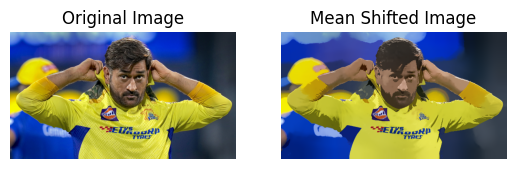

In [ ]:
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(blurred_image)
plt.title("Mean Shifted Image")
plt.axis("off")
plt.show()

### Graph Cut Segmentation

In [ ]:
image2 = cv2.imread("ms.jpg")
image2_rgb = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
mask = np.zeros(image2.shape[:2],np.uint8)
bgModel = np.zeros((1,65),np.float64)
fgModel = np.zeros((1,65),np.float64)

In [ ]:
rect = (80,20,400,700)
cv2.grabCut(image2_rgb,mask,rect,bgModel,fgModel,5,cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 2.69716213e-01,  1.35192040e-01,  1.65268675e-01,
          3.42389151e-01,  8.74339208e-02,  3.50652621e+00,
          4.37411340e+01,  1.60790742e+02,  1.53487315e+02,
          1.39871640e+02,  4.59161015e+01,  8.74373288e+01,
          1.20800548e+02,  1.97462740e+02,  3.76997719e+01,
          4.97670182e+01,  6.66846629e+01,  2.24753496e+02,
          1.99360823e+02,  3.20025893e+01,  3.29355662e+01,
          1.44048455e+01, -6.41217720e+01,  1.44048455e+01,
          1.52099354e+02,  3.08112658e+02, -6.41217720e+01,
          3.08112658e+02,  1.24782258e+03,  2.02852883e+03,
          1.80120372e+03, -1.61202521e+02,  1.80120372e+03,
          1.83756763e+03,  1.19281955e+02, -1.61202521e+02,
          1.19281955e+02,  1.65947701e+03,  1.77605141

In [ ]:
mask2 = np.where((mask==2) | (mask==0),0,1).astype("uint8")
kernel = np.ones((5, 5), np.uint8)
mask2 = cv2.morphologyEx(mask2, cv2.MORPH_OPEN, kernel)
result = image2_rgb*mask2[:,:,np.newaxis]

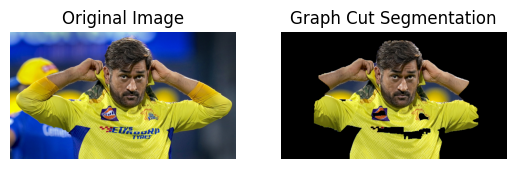

In [ ]:
plt.subplot(1,2,1)
plt.imshow(image2_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(result)
plt.title("Graph Cut Segmentation")
plt.axis("off")
plt.show()

### K-Means Segmentation

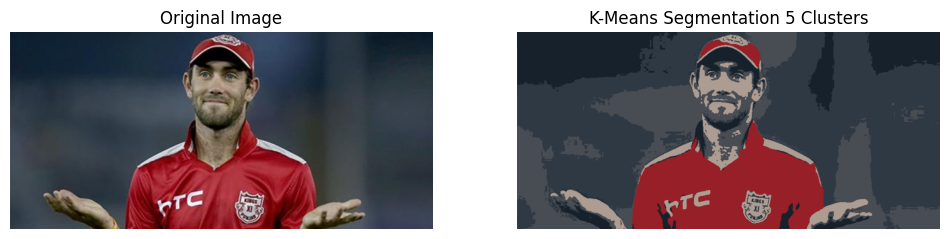

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

image = cv2.imread("gm.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, c = image.shape

pixels = image.reshape((-1, 3))
num_clusters = 5

random_indices = random.sample(range(len(pixels)), num_clusters)
centers = np.array([pixels[i] for i in random_indices], dtype=np.float32)

max_iterations = 15
for _ in range(max_iterations):
    distances = np.linalg.norm(pixels[:, np.newaxis] - centers, axis=2)
    labels = np.argmin(distances, axis=1)
    new_centers = np.array([pixels[labels == i].mean(axis=0) if np.any(labels == i) else centers[i] for i in range(num_clusters)])
    if np.linalg.norm(new_centers - centers) < 1e-4:
        break
    centers = new_centers

segmented_image = np.array([centers[label] for label in labels], dtype=np.uint8).reshape((h, w, c))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(segmented_image)
ax[1].set_title(f"K-Means Segmentation {num_clusters} Clusters")
ax[1].axis("off")

plt.show()

### Thresolding

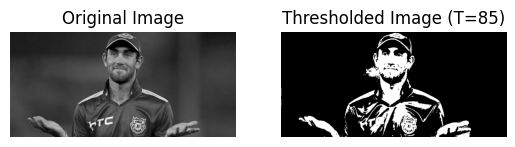

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("gm.png", cv2.IMREAD_GRAYSCALE)

threshold_value = 85

binary_image = np.where(image > threshold_value, 255, 0).astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap="gray")
plt.title(f"Thresholded Image (T={threshold_value})")
plt.axis("off")

plt.show()

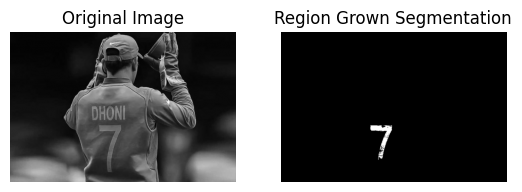

In [ ]:
image = cv2.imread("dhoni.jpg", cv2.IMREAD_GRAYSCALE)
segmented = np.zeros_like(image, dtype=np.uint8)

connectivity = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]

def region_growing(seed):
    global segmented
    height, width = image.shape
    visited = np.zeros_like(image, dtype=bool)
    threshold = 15
    seed_intensity = image[seed]

    stack = [seed]

    while stack:
        y, x = stack.pop()
        if not visited[y, x]:
            visited[y, x] = True
            segmented[y, x] = 255

            for dy, dx in connectivity:
                ny, nx = y + dy, x + dx
                if 0 <= ny < height and 0 <= nx < width:
                    if not visited[ny, nx] and abs(int(image[ny, nx]) - int(seed_intensity)) < threshold:
                        stack.append((ny, nx))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(segmented, cmap="gray")
    plt.title("Region Grown Segmentation")
    plt.axis("off")

    plt.show()

def select_seed():
    global image
    temp = image.copy()
    point = []

    def click_event(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            point.append((y, x))
            cv2.destroyAllWindows()

    cv2.imshow("Select Seed Point", temp)
    cv2.setMouseCallback("Select Seed Point", click_event)
    cv2.waitKey(0)
    return point[0] if point else None

seed = select_seed()
if seed:
    region_growing(seed)
else:
    print("No seed selected!")